In [34]:
import pickle
import pandas as pd
import numpy as np

import sys
sys.path.append("../src")  # Adjust this path as needed
from metrics import rmse_value, pearson_correlation
from vis import plot_eeg

In [21]:
with open("../data/denoised_data.pkl", "rb") as f:
    denoised_data_dict = pickle.load(f)

results_wt = denoised_data_dict["results_wavelet_denoising"]

In [32]:
for dataset_results in results_wt:
    metrics_results = pd.DataFrame(columns=['wavelet_type', 'level', 'threshold_mode', 'rmse', 'pearson_correlation'])
    signal_original, _ = dataset_results['dataset_original'][:]
    parameter_sets = dataset_results['parameter_sets']
    denoised_signals = dataset_results['denoised_signals']
    for parameter_set, denoised in zip(parameter_sets, denoised_signals):
        rmse_ = np.mean([rmse_value(orig, den) for orig, den in zip(signal_original, denoised)])
        pearson = np.mean([pearson_correlation(orig, den) for orig, den in zip(signal_original, denoised)])
        metrics_results.loc[len(metrics_results)] = [parameter_set['wavelet_type'], parameter_set['level'], parameter_set['threshold_mode'], rmse_, pearson]

,wavelet_type,level,threshold_mode,rmse,pearson_correlation
31,db8,1,hard,0.000016,0.947462
51,sym6,1,hard,0.000016,0.947407
21,db6,1,hard,0.000016,0.947026
41,sym4,1,hard,0.000016,0.945683
11,db2,1,hard,0.000017,0.938838
1,haar,1,hard,0.000020,0.918745
50,sym6,1,soft,0.000022,0.914847
30,db8,1,soft,0.000022,0.914676
20,db6,1,soft,0.000022,0.913723
40,sym4,1,soft,0.000022,0.912476


((64, 60000), (64, 60000))

In [49]:
best_denoised_df = pd.DataFrame(denoised_signals[31].T, columns=dataset_results['dataset_original'].ch_names)
original_df = pd.DataFrame(signal_original.T, columns=dataset_results['dataset_original'].ch_names)
# best_denoised_df.head(5)
# len(dataset_results['dataset_original'].ch_names)

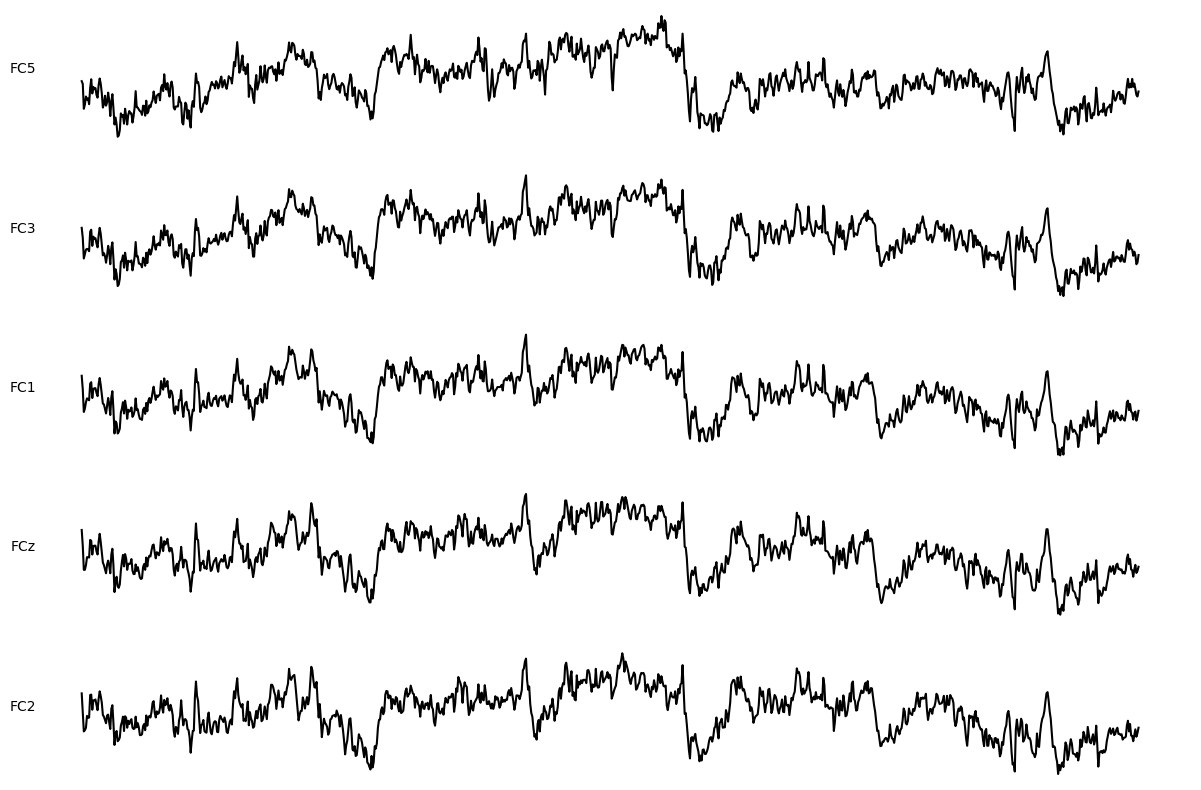

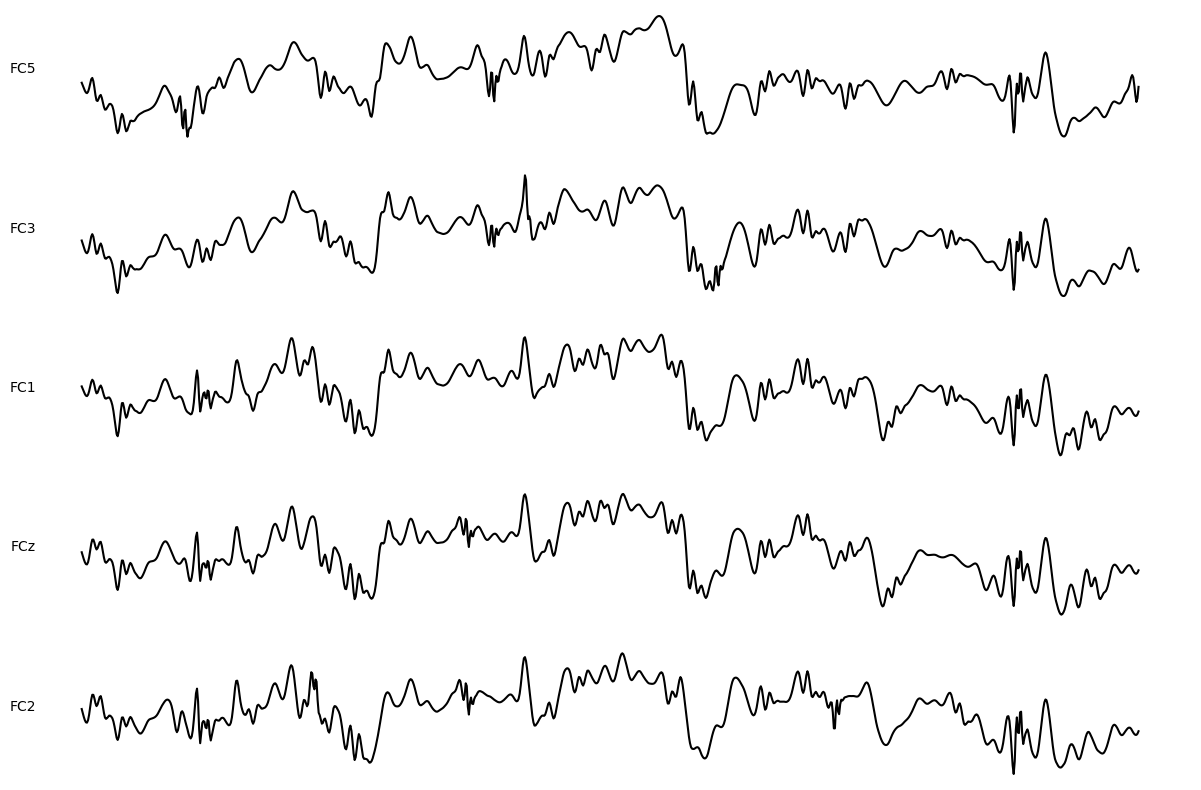

In [51]:
import matplotlib.pyplot as plt

# plt.subplot(1,2,1)
plot_eeg(original_df.iloc[:1000,:], 5)
# plt.subplot(1,2,2)
plot_eeg(best_denoised_df.iloc[:1000,:], 5)